# Indian Stock Market Analysis
This **Jupyter Notebook** is used to show the performance of **SENSEX** and Stock Market Analysis on this **Index**. 
## Introduction
The Sensex, short for the **Stock Exchange Sensitive Index**, is the benchmark stock index of the **Bombay Stock Exchange (BSE) in India.** It represents the **performance** of a selection of the top companies listed on the BSE.It is a free float, economy-weighted index of **30** financially sound and very well-established organizations listed on BSE. The Sensex is considered one of the most prominent stock market indices in **India** and is used to gauge the overall health and direction of the Indian stock market.  

Overall, the Sensex plays a vital role in the Indian financial markets, serving as a benchmark for various investment products such as index funds, exchange-traded funds (ETFs), and derivatives, and providing valuable insights into the dynamics of the Indian stock market.
## Start of the Analysis

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


The above libraries are used to perform various financial analysis on the SENSEX index.  
Now we will read the data from **sensex_data.csv** files which contains **10 years of data** related to the **SENSEX** index from **"01-01-2014"** to **"01-01-2024"** .

In [11]:
data = pd.read_csv('sensex_data.csv')
data.head()  # To see the first few rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,21222.189453,21244.349609,21133.820312,21140.480469,21140.480469,4000
1,2014-01-02,21179.910156,21331.320312,20846.669922,20888.330078,20888.330078,9300
2,2014-01-03,20819.580078,20885.179688,20731.330078,20851.330078,20851.330078,9300
3,2014-01-06,20913.789062,20913.789062,20721.980469,20787.300781,20787.300781,7600
4,2014-01-07,20845.769531,20890.480469,20637.179688,20693.240234,20693.240234,8100


The provided data in **sensex_data.csv** contains information about the Sensex index. Each row represents data for a specific date, and the columns represent different attributes of the Sensex index on those dates:
1. **Date:** The date for which the data is recorded.
2. **Open:** The opening value of the Sensex index on that date.
3. **High:** The highest value of the Sensex index reached during the trading session on that date.
4. **Low:** The lowest value of the Sensex index reached during the trading session on that date.
5. **Close:** The closing value of the Sensex index on that date.
6. **Adj Close:** The adjusted closing value of the Sensex index on that date (adjusted for any corporate actions such as dividends, stock splits, etc.).
7. **Volume:** The trading volume of the Sensex index on that date (i.e., the total number of shares traded).  

Now we will see the information related to the data types present in the sensex_data.csv. 

In [12]:
data.info()  # To get information about the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2454 non-null   object 
 1   Open       2454 non-null   float64
 2   High       2454 non-null   float64
 3   Low        2454 non-null   float64
 4   Close      2454 non-null   float64
 5   Adj Close  2454 non-null   float64
 6   Volume     2454 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 134.3+ KB


Below we will see some of the **basic statistics** such as count, mean, standard deviation, etc related to each column of the SENSEX data.

In [13]:
# Summery stats for SENSEX Index
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,39713.545195,39899.981062,39455.339996,39677.455538,39677.455538,1.426370e+05
std,13554.809807,13609.144785,13495.240618,13560.939039,13560.939039,1.508377e+06
min,20050.990234,20255.519531,19963.119141,20193.349609,20193.349609,0.000000e+00
25%,28014.090332,28143.279297,27826.524902,27993.437988,27993.437988,8.400000e+03
50%,35836.220703,35996.595703,35554.914062,35776.974609,35776.974609,1.130000e+04
75%,52631.533203,52816.393555,52345.579102,52547.592773,52547.592773,1.610000e+04
max,72351.593750,72484.343750,72137.453125,72410.382812,72410.382812,3.181510e+07


## Plotting SENSEX Data 
Below is a plot of Closing price of SENSEX over the time period of 10 years with highest, lowest and median values on the chart.

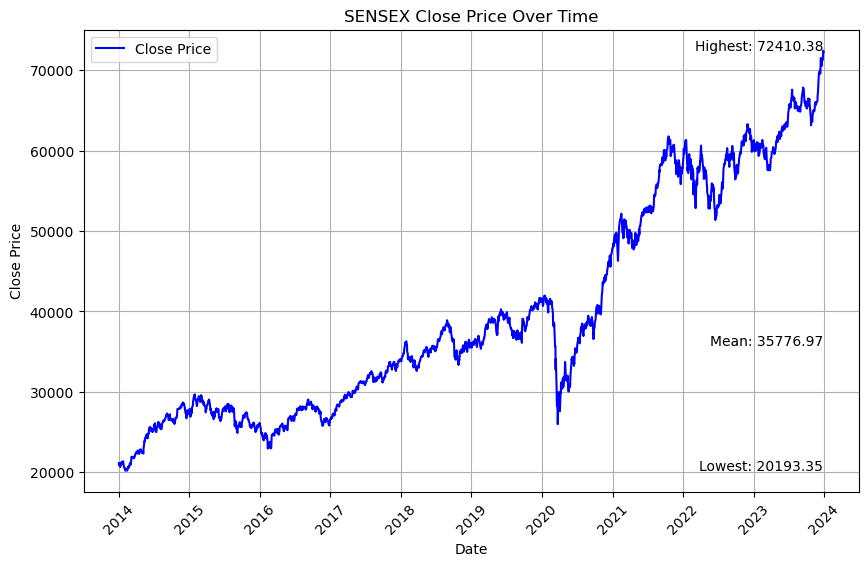

In [45]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Plotting SENSEX data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')

# Display the highest, lowest, and median values on the chart
highest = data['Close'].max()
lowest = data['Close'].min()
median = data['Close'].median()
plt.text(data['Date'].iloc[-1], highest, f'Highest: {highest:.2f}', ha='right')
plt.text(data['Date'].iloc[-1], lowest, f'Lowest: {lowest:.2f}', ha='right')
plt.text(data['Date'].iloc[-1], median, f'Mean: {median:.2f}', ha='right')

# Add labels and title
plt.title('SENSEX Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [15]:
# Calculate mean
mean_close = data['Close'].mean()

# Calculate median
median_close = data['Close'].median()

# Calculate standard deviation
std_close = data['Close'].std()

print("Mean Close Price:", mean_close)
print("Median Close Price:", median_close)
print("Standard Deviation of Close Price:", std_close)

Mean Close Price: 39677.455538152
Median Close Price: 35776.974609375
Standard Deviation of Close Price: 13560.939038842025


## Plot of Volume Traded over Time
Below is the graph which shows the total volume of stock being traded each day over the past 10 years. It also shows that in the year **2019** there was a huge increase in the volume of the stock traded.

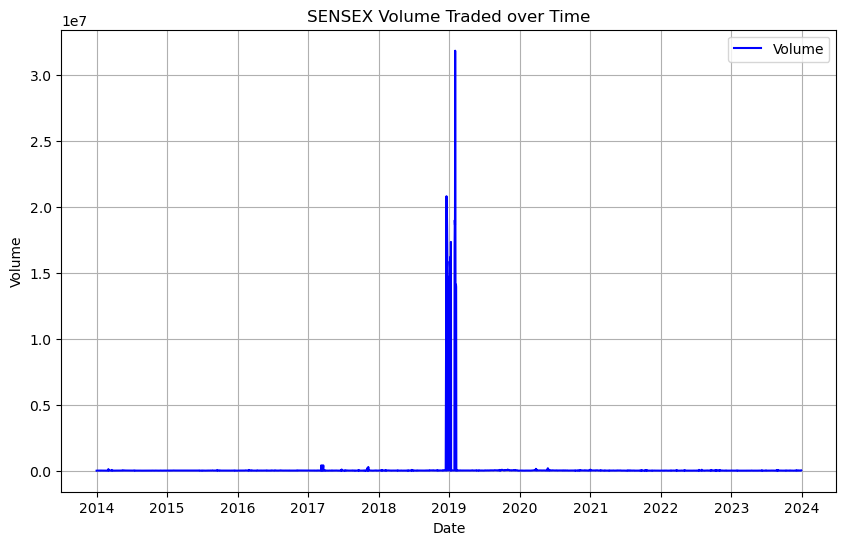

In [48]:
# Now let's plot the total volume of stock being traded each day over the past 10 years
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'], color='blue', label='Volume')
plt.title('SENSEX Volume Traded over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

## Daily Return
**Daily return** refers to the percentage change in the value of an investment or asset from one trading day to the next. It is a measure of how much the value of the investment has changed over a single day of trading.


In [16]:
# Calculate daily returns Percentage
data['Returns'] = data['Close'].pct_change() * 100

# Display the first few rows
print(data[['Date', 'Returns']].head())

        Date   Returns
0 2014-01-01       NaN
1 2014-01-02 -1.192737
2 2014-01-03 -0.177132
3 2014-01-06 -0.307075
4 2014-01-07 -0.452490


## SMA: Simple Moving Average
A **simple moving average (SMA)** is a technical analysis tool used to smooth out price data by calculating the average of a set of prices over a specified number of periods. It is commonly used to identify trends and potential support or resistance levels in financial markets.  
To calculate a simple moving average, you sum up the closing prices of the asset for a certain number of periods and then divide by the number of periods. The result is the average closing price over those periods. This process is repeated for each subsequent period, shifting the window along the price series.

In [17]:
# Calculate 50-day and 200-day moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Display the first few rows
print(data[['Date', 'SMA_50', 'SMA_200']].tail())

           Date        SMA_50       SMA_200
2449 2023-12-22  66836.738828  64143.971699
2450 2023-12-26  66934.013828  64203.600293
2451 2023-12-27  67046.614609  64269.245684
2452 2023-12-28  67169.167422  64332.252754
2453 2023-12-29  67290.633984  64392.331738


Below is a chart with Closing price, Simple Moving Average for a period of 50 days and 200 days are plot together to see the variation.

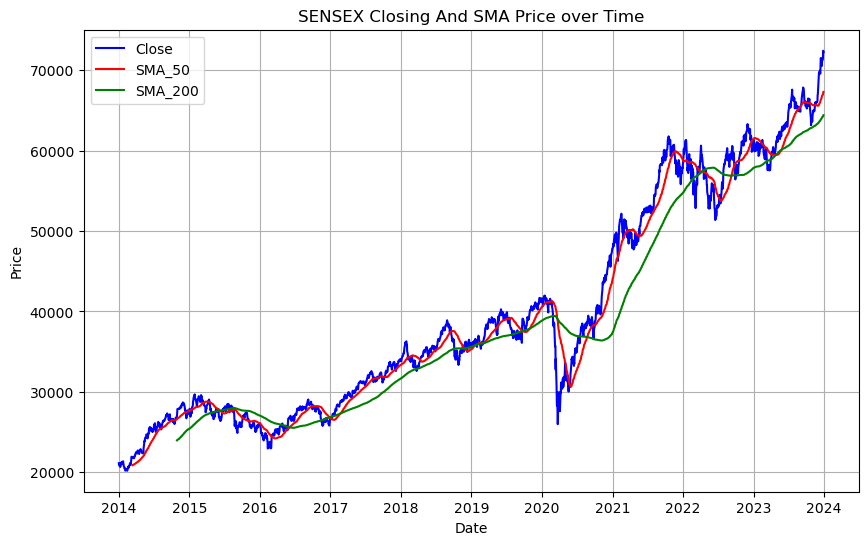

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label="Close")
plt.plot(data['Date'], data['SMA_50'], color='red', label="SMA_50")
plt.plot(data['Date'], data['SMA_200'], color='green', label="SMA_200")
plt.title('SENSEX Closing And SMA Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

## Daily Return Analysis Plot
Below is the plot of daily return percentage over time which highlights the variation in prices. 

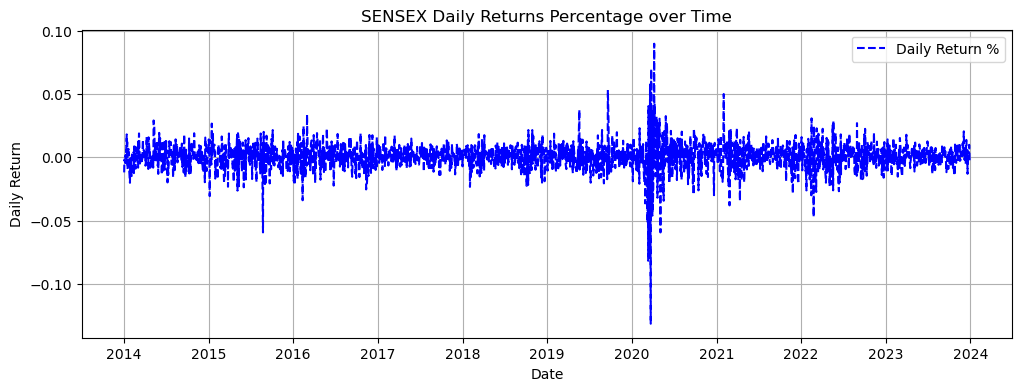

In [34]:
# We'll use pct_change to find the percent change for each day
data['Daily Return'] = data['Close'].pct_change()
# Lets plot the daily return percentage
plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['Daily Return'], color='blue', label='Daily Return %', linestyle='--')
plt.title('SENSEX Daily Returns Percentage over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

c:\Users\lweovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Count'>

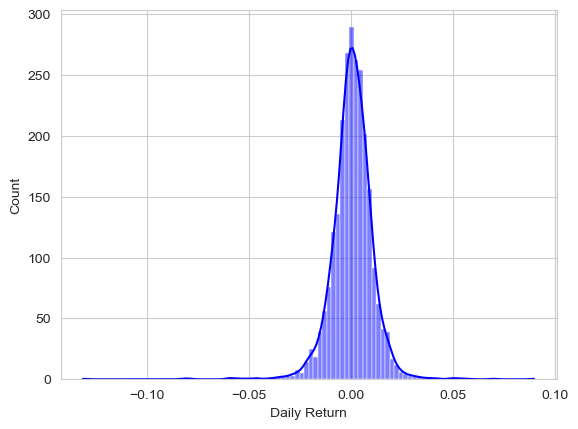

In [65]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(data['Daily Return'].dropna(),bins=100,color='blue',kde=True)

## Yearly Returns of SENSEX
Below is a bar graph that shows the yearly returns of the SENSEX over the last 10 years.

In [40]:
# Extract year from the Date column
data['Year'] = data['Date'].dt.year

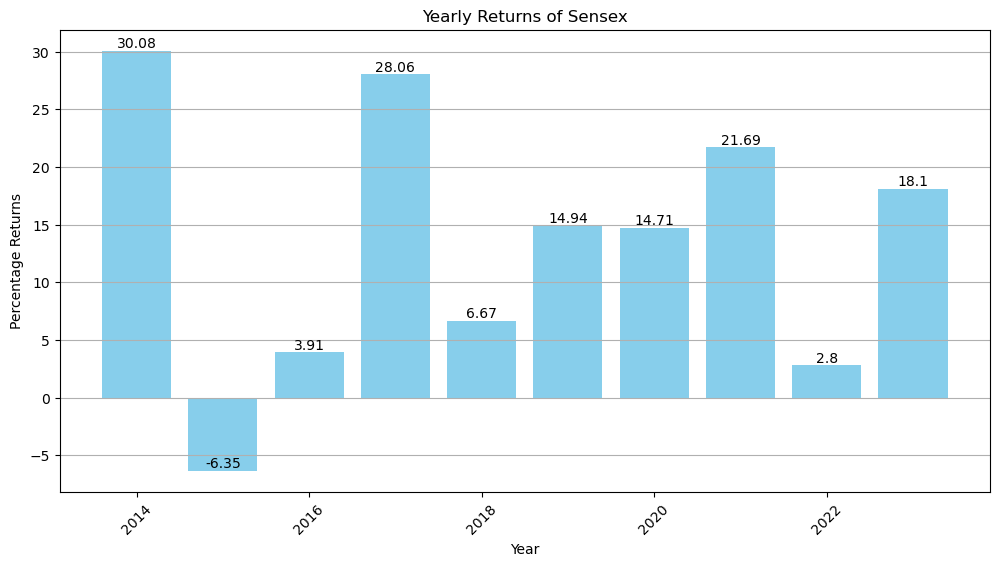

In [43]:
# Calculate yearly returns
yearly_returns = data.groupby('Year')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Plotting yearly returns
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_returns.index, yearly_returns, color='skyblue')

# Adding data value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
plt.title('Yearly Returns of Sensex')
plt.xlabel('Year')
plt.ylabel('Percentage Returns')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()